# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
largest_us_retailers=pd.read_csv("/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv")
largest_us_retailers.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Se ordena el dataset por cantidad de ventas y se toman los valores sin contar el primer indice para calcular el promedio.

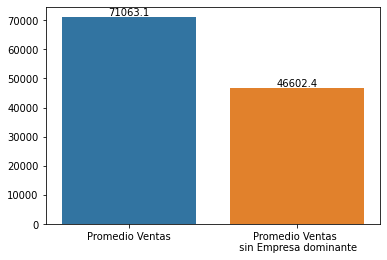

In [ ]:
largest_us_retailers=largest_us_retailers.sort_values(by='Sales',ascending=False).reset_index(drop=True)
sales_mean=largest_us_retailers.Sales.mean()
sales_mean_wo_top = largest_us_retailers.iloc[1:].Sales.mean()
ax=sns.barplot(x=['Promedio Ventas','Promedio Ventas \n sin Empresa dominante'],y=[sales_mean,sales_mean_wo_top])
for i in ax.containers:
    ax.bar_label(i,)

* El promedio de ventas sin la empresa dominante es de: 46,602

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

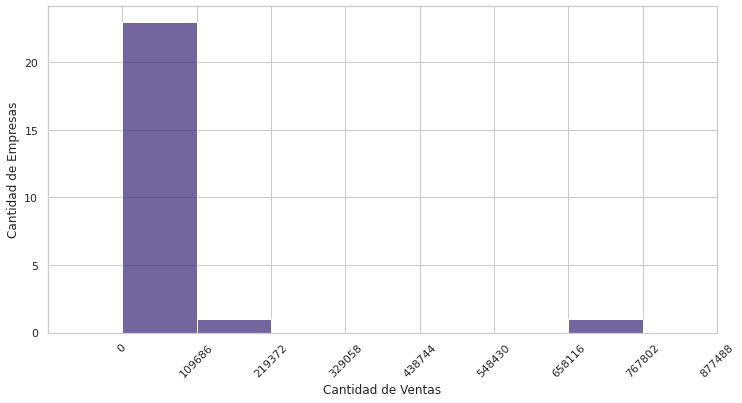

In [ ]:
import math
sns.set_theme(style='whitegrid',palette='viridis')
n_bins= round(2*math.pow(largest_us_retailers.Sales.count(),1/3)) #obteniendo el numero de bins con la formula de Rice n_bins=2* (n)^(1/3) redondeado hacia arriba.

max_sales=int(largest_us_retailers.Sales.max())
bin_range=range(0,max_sales*2,max_sales//n_bins)

ax=plt.figure(figsize=(12, 6))
ax=sns.histplot(x=largest_us_retailers.Sales,bins=bin_range)
ax.set(xlabel='Cantidad de Ventas',ylabel='Cantidad de Empresas')
plt.xlim([-max_sales//n_bins, (max_sales+2*(max_sales//n_bins))])
ax=ax.set_xticks(range(0,max_sales+2*(max_sales//n_bins),(max_sales//n_bins)))
ax=plt.xticks(rotation=45)

* Según la gráfica, la mayoría de las tiendas vendieron hasta 109,686.
* Se puede ver que hay un valor de ventas aislado a los demás datos, este representa las ventas de Walmart US.

Ahora revisemos como se comporta sin el valor aislado de Walmart:

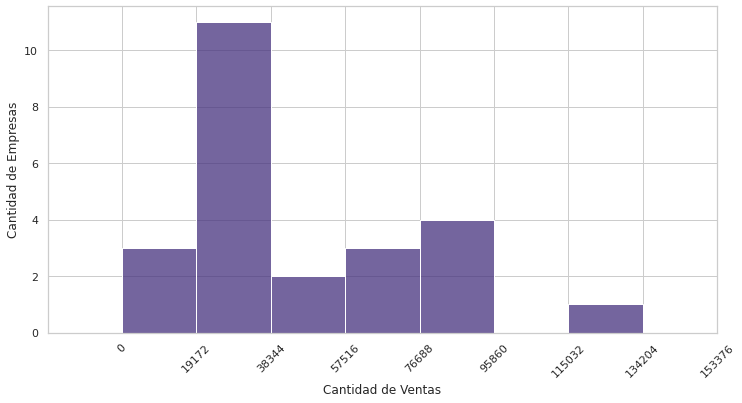

In [ ]:
import math
sns.set_theme(style='whitegrid',palette='viridis')
n_bins= round(2*math.pow(largest_us_retailers.iloc[1:].Sales.count(),1/3)) #obteniendo el numero de bins con la formula de Rice n_bins=2* (n)^(1/3) redondeado hacia arriba.
max_sales=int(largest_us_retailers.iloc[1:].Sales.max())
bin_range=range(0,max_sales*2,max_sales//n_bins)

ax=plt.figure(figsize=(12, 6))
ax=sns.histplot(x=largest_us_retailers.iloc[1:].Sales,bins=bin_range)
ax.set(xlabel='Cantidad de Ventas',ylabel='Cantidad de Empresas')
plt.xlim([-max_sales//n_bins, (max_sales+2*(max_sales//n_bins))])
ax=ax.set_xticks(range(0,max_sales+2*(max_sales//n_bins),(max_sales//n_bins)))
ax=plt.xticks(rotation=45)

* Nuestros resultados cambian, la mayoría de las compañías (sin walmart) venden entre 19,172 y 38,344. 

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

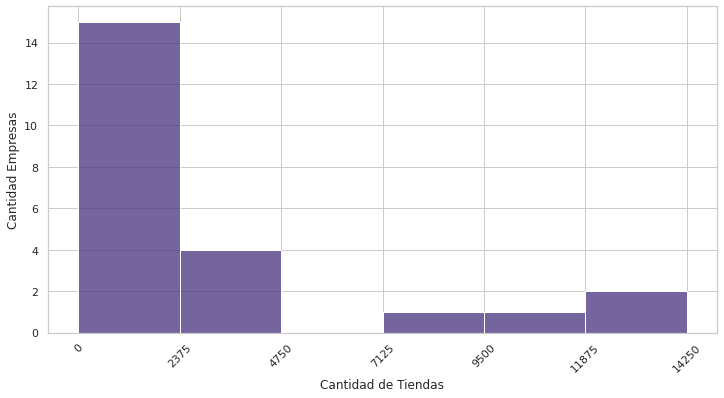

In [ ]:
sns.set_theme(style='whitegrid',palette='viridis')
ax=plt.figure(figsize=(12, 6))

n_bins= round(2*math.pow(largest_us_retailers.Stores.count(),1/3))
max_stores=int(largest_us_retailers.Stores.max())

bin_range=range(0,max_stores+max_stores//n_bins,max_stores//n_bins)
ax=sns.histplot(largest_us_retailers.Stores,bins=bin_range)
ax.set(xlabel='Cantidad de Tiendas',ylabel='Cantidad Empresas')

ax=ax.set_xticks(bin_range)
Sax=plt.xticks(rotation=45)

* Se puede observar en la gráfica la mayoría de las compañias tiene hasta 2375 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Podemos hacer un diagrama de dispersión para ver si hay alguna tendencia entre la cantidad de tiendas y ventas.

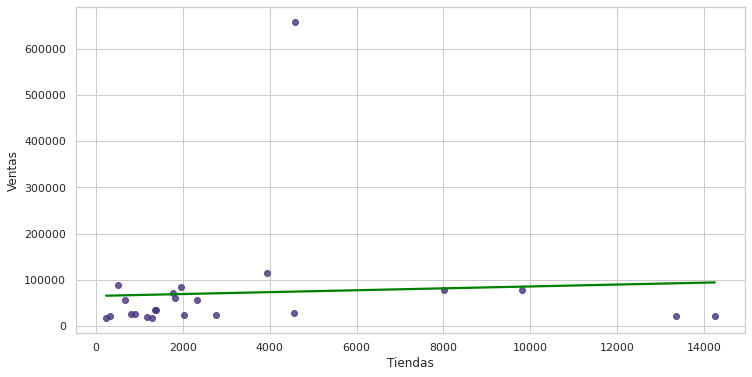

In [ ]:
sns.set_theme(style='whitegrid',palette='viridis')
ax=plt.figure(figsize=(12, 6))
ax=sns.regplot(x=largest_us_retailers.Stores,y=largest_us_retailers.Sales,ci=None,line_kws={"color": "green"})
ax=ax.set(xlabel='Tiendas',ylabel='Ventas')

* La gráfica nos muestra que no hay correlación entre tener más tiendas y tener más ventas.


### 5. ¿Cuál es el rango que existe entre las ventas?

El rango de ventas se calcularía restandole el mínimo al valor máximo.

In [ ]:
sales_range=largest_us_retailers.Sales.max()-largest_us_retailers.Sales.min()
print(f'El rango entre ventas sería: ${sales_range}')

El rango entre ventas sería: $641527


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Primero obtenemos las 5 compañías con más tiendas físicas y las 5 con más ventas:

In [ ]:
top_five_stores=largest_us_retailers.sort_values(by='Stores',ascending=False).reset_index()
top_five_sales=largest_us_retailers.sort_values(by='Sales',ascending=False).reset_index()

En el siguiente gráfico se pueden ver las 5 compañías con más tiendas.

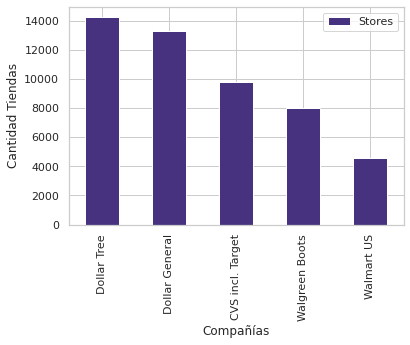

In [ ]:
top_five_stores= top_five_stores[:5]
ax = top_five_stores.plot.bar(x='Company',y='Stores')
ax=ax.set(xlabel='Compañías',ylabel='Cantidad Tiendas')

Y las cinco compañías con más ventas son:

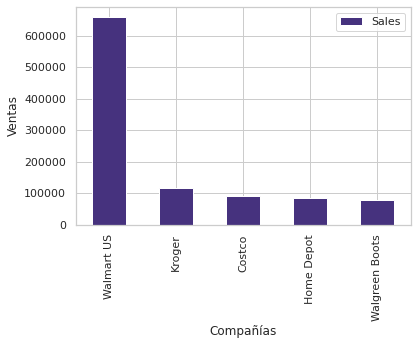

In [ ]:
top_five_sales=top_five_sales[:5]
ax=top_five_sales.plot.bar(x='Company',y='Sales')
ax=ax.set(xlabel='Compañías',ylabel='Ventas')

Haciendo un join interno se pueden descubrir cuales compañías están en ambas listas.

In [ ]:
top_five_inner = pd.merge(top_five_stores, top_five_sales, how='inner',on='Company')
top_five_inner['Company']

0    Walgreen Boots
1        Walmart US
Name: Company, dtype: object

* Las compañías que están en el top 5 de tiendas y top 5 de ventas son Walgreen Boots y Walmart US.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

Primero revisemos la columna de categoría para ver con que tratamos:

In [ ]:
largest_us_retailers.Category.unique()

array(['Supercenters', 'Grocery', 'Warehouse Club', 'Home Improvement',
       'Drug Stores', 'Electronic/Mail Order', 'Warehouse Clubs', nan,
       'Electronics', 'Department Stores', 'Apparel', 'Dollar Stores'],
      dtype=object)

Hay un valor nan en nuestra columna, revisando el dataset nos damos cuenta que le corresponde a la compañía Apple Inc. Online. Buscando información en la red, podemos encontrar que Apple es una compañía de electrónicos de consumo<sup>1</sup> así que podemos cambiar su categoría a 'electronics'.

<sup>1</sup>https://en.wikipedia.org/wiki/Apple_Inc.#cite_ref-Apple_Q4_Result_Filing_1-0

También tenemos tenemos dos categorías 'Warehouse Club' y 'Warehouse Clubs' que deberían ser la mísma, para tener consistencia ambas serán 'Warehouse Club'.


In [ ]:
largest_us_retailers.loc[largest_us_retailers.Category.notna()==False]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


In [ ]:
largest_us_retailers.at[11,'Category']='Electronics'
largest_us_retailers.iloc[11]

Company               Apple incl. Online
Sales                              37664
Stores                               NaN
Sales/Avg. Store                     NaN
Store Count Growth                   NaN
Category                     Electronics
Name: 11, dtype: object

In [ ]:
largest_us_retailers[largest_us_retailers.Category=='Warehouse Clubs']

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


In [ ]:
largest_us_retailers.at[10,'Category']='Warehouse Club'
largest_us_retailers.iloc[10]

Company                   Sam's Club
Sales                          56828
Stores                         655.0
Sales/Avg. Store           87.293395
Store Count Growth          0.012365
Category              Warehouse Club
Name: 10, dtype: object

Ahora que todas las compañías tienen categoría podemos hacer un conteo de cuales generan más ventas y generar un gráfico de barras para poder visualizarlo más fácilmente.

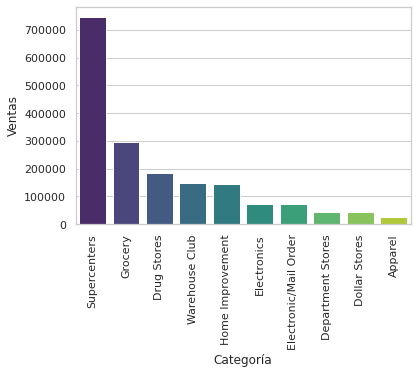

In [ ]:
sns.set_theme(style='whitegrid',palette='viridis')
sales_by_cat=largest_us_retailers.groupby('Category').Sales.sum().sort_values(ascending=False)
ax=sns.barplot(x=sales_by_cat.index,y=sales_by_cat,palette='viridis')
ax.set(xlabel='Categoría',ylabel='Ventas')
ax=plt.xticks(rotation=90)

* Claramente los supercenters son los negocios que generan las mayores ventas, esto se veía venir pues Walmart US supera con creces a todos sus competidores y tiene influencia en todos nuestros analisis

Para ver un resultado un poco menos influenciado por los outliers sería interesante ver como se comporta este gráfico pero sin contar a Walmart

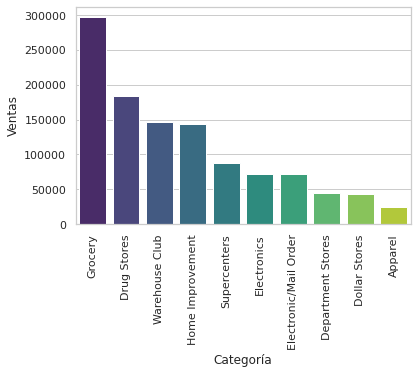

In [ ]:
sns.set_theme(style='whitegrid',palette='viridis')
sales_by_cat=largest_us_retailers.iloc[1:].groupby('Category').Sales.sum().sort_values(ascending=False)
ax=sns.barplot(x=sales_by_cat.index,y=sales_by_cat,palette='viridis')
ax.set(xlabel='Categoría',ylabel='Ventas')
ax=plt.xticks(rotation=90)

* En este gráfico se puede ver que sin la influencia de Walmart US las ventas de los Supercenters cae hasta el 5to lugar, dejando como mayores ventas a la categoría Grocery, esto nos sirve como dato adicional para tomar decisiones.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Amazon y Apple no tienen tiendas registradas en el dataset. Amazon no tiene tiendas físicas pero Apple sí tiene Apple Stores, sin embargo, no hay forma de corroborar que la información venga de tiendas fisicas y no solamente de sus tiendas Online, así que las tomaremos como puramente online.

Tomando esta información en cuenta, lo que prosigue es calcular cuantas ventas por tienda tiene la compañía. 

In [ ]:
largest_us_retailers['Ventas/Tienda'] = largest_us_retailers['Sales'] / largest_us_retailers['Stores']

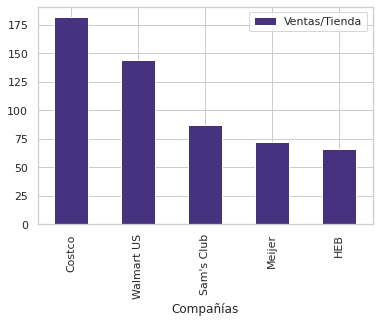

In [ ]:
ventas_tienda=largest_us_retailers.sort_values(by='Ventas/Tienda',ascending=False).loc[:,['Company','Ventas/Tienda']]
ax=ventas_tienda.head(5).plot.bar(x='Company',y='Ventas/Tienda')
ax=ax.set(xlabel='Compañías')

* La compañía con la mayor cantidad de ventas por tienda es Costco

* Walmart US lo sigue de cerca, sin embargo, a pesar de tener una cantidad de ventas impresionante, también tiene la mayor cantidad de tiendas de las compañías del dataset, lo que baja mucho su ratio de ventas/tiendas.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Como vimos anteriormente Amazon y Apple son las empresas que no tienen tiendas físicas.

In [ ]:
largest_us_retailers.loc[largest_us_retailers.Stores.notna()==False]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Ventas/Tienda
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
11,Apple incl. Online,37664,NaN,NaN,NaN,Electronics,NaN


Para revisar si las ventas destacan podemos comparar con el promedio de ventas de las compañías sin ventas en línea.

In [ ]:
online_indices=largest_us_retailers.index[largest_us_retailers.Company=='Amazon'].to_list()
online_indices.append(largest_us_retailers.index[largest_us_retailers.Company=='Apple incl. Online'][0])
online_indices

[6, 11]

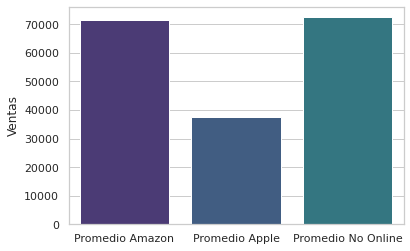

In [ ]:

sales_mean=largest_us_retailers.Sales.drop(index=online_indices).mean()
amazon_mean=largest_us_retailers[largest_us_retailers['Company']=='Amazon']['Sales'].reset_index(drop=True)[0]
apple_mean=largest_us_retailers[largest_us_retailers['Company']=='Apple incl. Online']['Sales'].reset_index(drop=True)[0]

#Graficando
sns.set_theme(style='whitegrid',palette='viridis')
g=sns.barplot(x=['Promedio Amazon','Promedio Apple','Promedio No Online'],y=[amazon_mean,apple_mean,sales_mean])
g=g.set(ylabel='Ventas')

Las ventas de Amazon estan justo en el promedio y las de Apple se quedan muy por debajo. Pero si recordamos, Walmart US mueve el promedio muy por encima, por lo que una mejor opción puede ser comparar con la mediana:

In [ ]:
sales_median=largest_us_retailers.Sales.drop(index=online_indices).median()
sales_median

34408.0

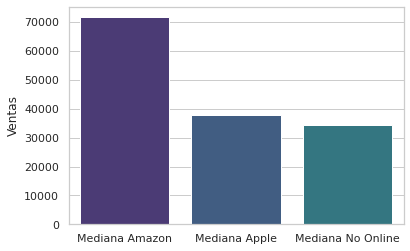

In [ ]:
amazon_median=largest_us_retailers[largest_us_retailers['Company']=='Amazon']['Sales'].reset_index(drop=True)[0]
apple_median=largest_us_retailers[largest_us_retailers['Company']=='Apple incl. Online']['Sales'].reset_index(drop=True)[0]

#Graficando
sns.set_theme(style='whitegrid',palette='viridis')
g=sns.barplot(x=['Mediana Amazon','Mediana Apple','Mediana No Online'],y=[amazon_median,apple_median,sales_median])
g=g.set(ylabel='Ventas')

Amazon destaca pues está por encima de la mediana, al igual que apple, pero Apple por una menor cantidad.

* En general las ventas de las tiendas on-line no se quedan muy por detrás de las tiendas tradicionales.

## III. Tus propias preguntas

### 10. ¿Cuáles son las tiendas con mayor y menor crecimiento?

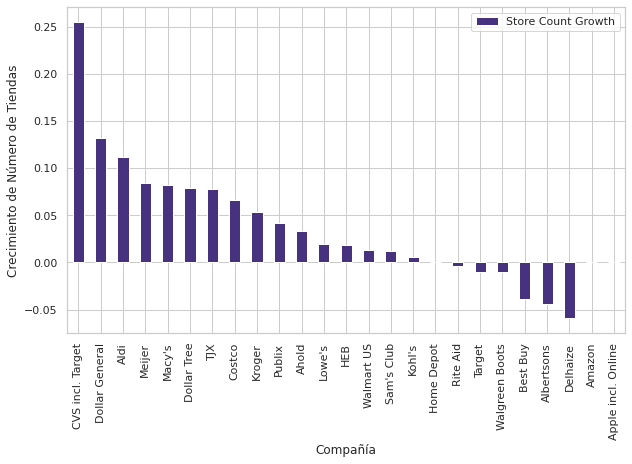

In [ ]:
top_grow=largest_us_retailers.sort_values(by='Store Count Growth',ascending=False).reset_index(drop=True)
top_grow=top_grow.fillna(0)
ax=top_grow.plot.bar(x='Company',y='Store Count Growth',figsize=(10,6))
ax=ax.set(xlabel='Compañía',ylabel='Crecimiento de Número de Tiendas')

* Las compañías con un mayor crecimiento en tiendas son CVS, Dollar General y Aldi.
* Las compañías con menor crecimiento de numero de tiendas están de hecho en una etapa de decrecimiento, estas son: Best Buy, Albertsons y Delhaize

### 11. ¿Existe alguna relación entre las ventas de la tienda y el aumento de tiendas? (Store Count Growth)

Nuestra lógica nos diría que al haber más ventas, deberían de poner más tiendas.

[Text(0.5, 0, 'Tiendas'), Text(0, 0.5, 'Crecimiento de Número de Tiendas')]

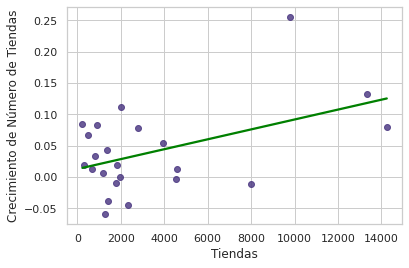

In [ ]:
ax=sns.regplot(x=largest_us_retailers.Stores,y=largest_us_retailers['Store Count Growth'],ci=None,line_kws={"color": "green"})
ax.set(xlabel='Tiendas',ylabel='Crecimiento de Número de Tiendas')

* Nuestra gráfica muestra una ligera correlación, sin embargo no es tan significativa.
* Sería interesante revisar si el promedio de ventas por tienda tiene alguna relación más significativa.

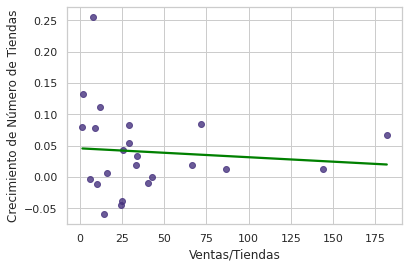

In [ ]:
ax=sns.regplot(x=largest_us_retailers['Ventas/Tienda'],y=largest_us_retailers['Store Count Growth'],ci=None,line_kws={"color": "green"})
ax=ax.set(xlabel='Ventas/Tiendas',ylabel='Crecimiento de Número de Tiendas')

* Curiosamente encontramos una muy ligera correlación negativa, entre mayor ventas/tienda hay un menor crecimiento de tiendas, sin embargo no es muy significativa.

### 12. ¿Qué categoría de tiendas tiene más tiendas?

Es interesante saber que clase de tiendas tienen mayor presencia en general y si esto tiene alguna relación con el crecimiento de tiendas.

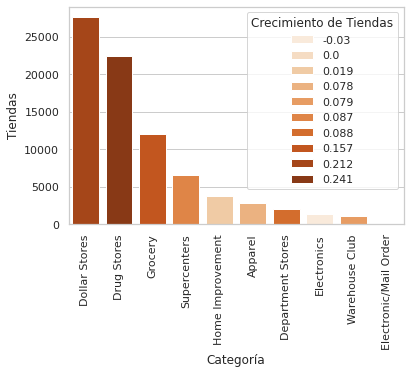

In [ ]:
stores_by_cat=sales_by_cat=largest_us_retailers.groupby('Category').sum().sort_values(by='Stores',ascending=False)
stores_by_cat=stores_by_cat.fillna(0)
g=sns.barplot(x=stores_by_cat.index,y=stores_by_cat['Stores'],palette='Oranges',hue=sales_by_cat['Store Count Growth'],dodge=False)
g.set(xlabel='Categoría',ylabel='Tiendas')
handles, labels = g.get_legend_handles_labels() #Reducir decimales de valores de color
new_labels = [label[:5] for label in labels]
g.legend(handles, new_labels, title = 'Crecimiento de Tiendas')

g=plt.xticks(rotation=90)

* Las categorías con mayor cantidad de tiendas son las 'Dollar Stores' y las 'Drug Stores'.
* Es interesante ver que a pesar de ser las que más tiendas tienen,siguen poniendo tiendas pues tienen el mayor crecimiento, ¡No se detienen por nada!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e6a13be-79e9-4307-89ea-d7b2b06b91a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>